# Bài tập về nhà Decision Tree, Random Forest


- Thực hiện các yêu cầu dưới đây với tập dữ liệu Australian credit
- Down dữ liệu tại đường link dưới đây và đặt vào folder /data
 
  https://archive.ics.uci.edu/ml/datasets/Statlog+(Australian+Credit+Approval)
    

In [ ]:
# import packages,...

# set random_state = 0


## 1. Tìm hiểu dữ liệu

In [ ]:
'''
- Tìm hiểu cấu trúc data tại trang web UCI
- Down các files, đặt trong folder data/
- Chú ý:
    - Đọc mô tả dữ liệu trong file 'australian.doc'
    - Kiểm tra DecisionTree/RandomForest của Sklearn có hỗ trợ với kiểu dữ liệu được cung cấp không
'''
data_path = 'australian.dat'

## 2. Decision Tree

### 2.1. Khảo sát các giá trị khác nhau của max_depth

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
import pandas as pd

# Load the .dat file with tab-separated values
data = pd.read_csv(data_path, sep='\t', header=None)
data = data[0].str.split(expand=True)
data.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15']
data.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data.values[:,:14],data.values[:,14],test_size=0.2,random_state=40)

In [ ]:
tree_clf=DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train,y_train) 

DecisionTreeClassifier(random_state=42)

In [ ]:
tree_clf.score(x_test,y_test)

0.8188405797101449

In [ ]:
index=[]
test_score=[]
train_score=[]
for i in range(1,10):
    tree_clf=DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(x_train,y_train)
    index.append(i)
    test_score.append(tree_clf.score(x_test,y_test))
    train_score.append(tree_clf.score(x_train,y_train))
    print(f'{i}: {tree_clf.score(x_test,y_test)}')

1: 0.8623188405797102
2: 0.8623188405797102
3: 0.855072463768116
4: 0.855072463768116
5: 0.8478260869565217
6: 0.8333333333333334
7: 0.8260869565217391
8: 0.8333333333333334
9: 0.8260869565217391


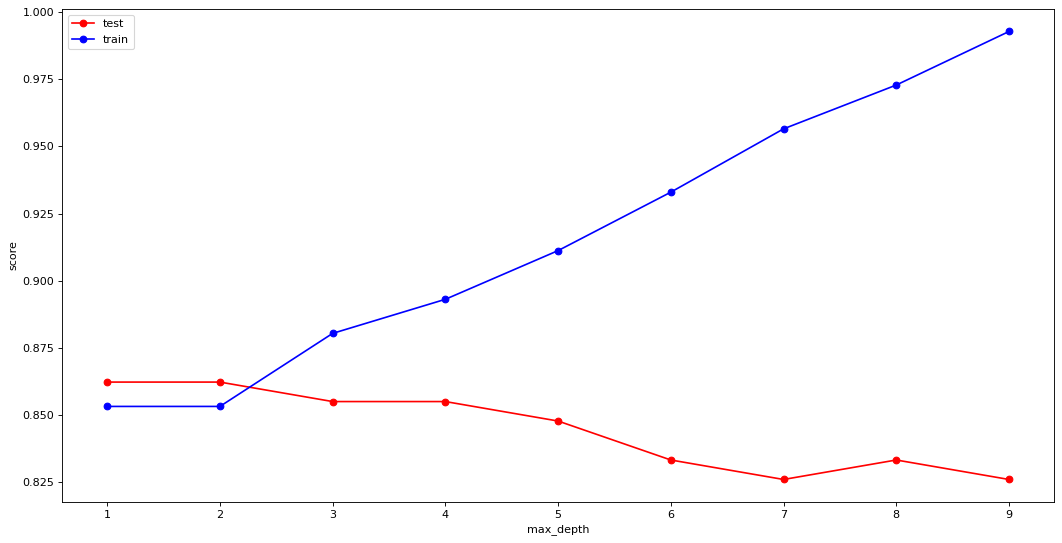

In [ ]:
plt.figure(figsize=(16,8),dpi=80)
plt.plot(index,test_score,marker='o',color='r')
plt.plot(index,train_score,marker='o',color='b')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend(['test','train'])
plt.show()
# max_depth=2 is the best option

### 2.2. Tìm kiếm siêu tham số

In [ ]:
#code
search_space={
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[1, 2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]
}
gs=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),param_grid=search_space,scoring='accuracy',cv=5)
gs.fit(x_train,y_train)


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 265, in fit
    check_scalar(
  File "/shared-libs/python3.9/py/lib

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2}
0.8604914004914006


## 3. Random Forest

### 3.1 Khảo sát các giá trị khác nhau của n_estimators

In [ ]:
#code
index=[]
test_score=[]
train_score=[]
for i in range(1,21):
    tree_clf=RandomForestClassifier(n_estimators=i)
    tree_clf.fit(x_train,y_train)
    index.append(i)
    test_score.append(tree_clf.score(x_test,y_test))
    train_score.append(tree_clf.score(x_train,y_train))
    print(f'{i}: {tree_clf.score(x_test,y_test)}')

1: 0.7681159420289855
2: 0.8478260869565217
3: 0.8695652173913043
4: 0.855072463768116
5: 0.8623188405797102
6: 0.8115942028985508
7: 0.8913043478260869
8: 0.855072463768116
9: 0.8623188405797102
10: 0.8913043478260869
11: 0.855072463768116
12: 0.8985507246376812
13: 0.8913043478260869
14: 0.8840579710144928
15: 0.8840579710144928
16: 0.8913043478260869
17: 0.9057971014492754
18: 0.8840579710144928
19: 0.8913043478260869
20: 0.8840579710144928


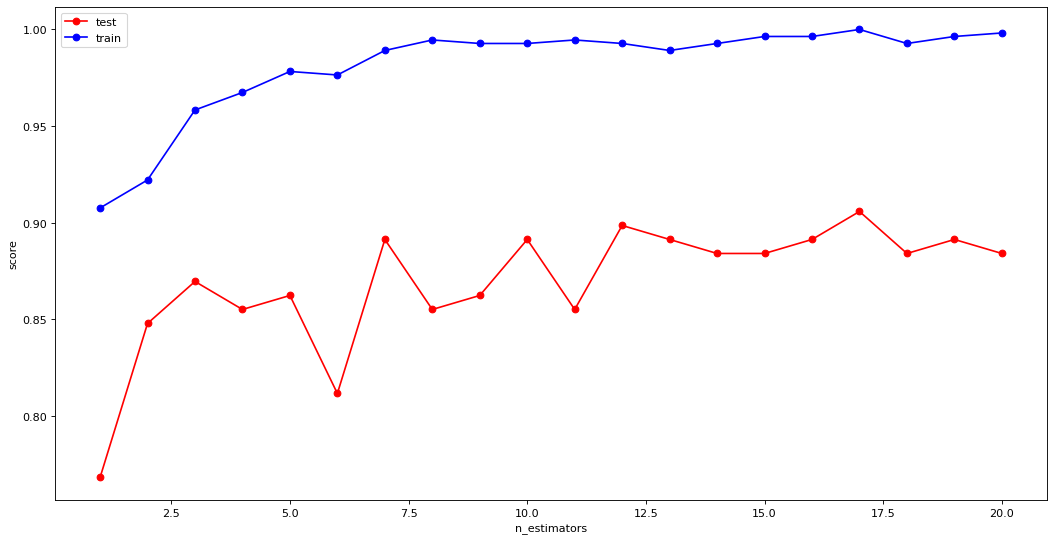

In [ ]:
plt.figure(figsize=(16,8),dpi=80)
plt.plot(index,test_score,marker='o',color='r')
plt.plot(index,train_score,marker='o',color='b')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend(['test','train'])
plt.show()

### 3.2 Tìm kiếm siêu tham số

In [ ]:
# code
search_space={
    'n_estimators':range(1,21),
    'max_depth':range(1,5),
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,5),
    'max_leaf_nodes':range(1,11),
}
gs=GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=search_space,scoring='accuracy')
gs.fit(x_train,y_train)


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20800 fits failed out of a total of 64000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16000 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):


GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(1, 5),
                         'max_leaf_nodes': range(1, 11),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5),
                         'n_estimators': range(1, 21)},
             scoring='accuracy')

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 9}
0.8641769041769042


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=de95356d-1554-48f3-b6b7-07662dc21a41' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>